<a href="https://colab.research.google.com/github/KolipakaRamesh/AIML_Practice_Excercises/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A confusion matrix is a table used to evaluate the performance of a classification model. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

Here's a sample code to generate and display a confusion matrix using `sklearn`:


Y-True: [0 1 0 1 0 1 1 0 1 0]

Y-Pred: [0 1 1 1 0 0 1 0 1 1]

Confusion Matrix: [[3 2]
 [1 4]]


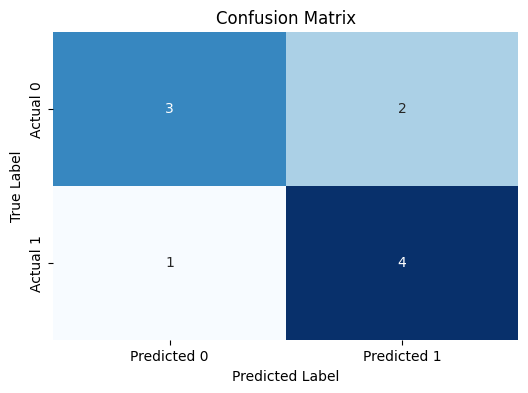

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example true and predicted labels
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

print("\nY-True:",y_true)
print("\nY-Pred:",y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:",cm)

# Display the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In this example:

- `y_true` are the actual labels.
- `y_pred` are the labels predicted by the model.
- `confusion_matrix(y_true, y_pred)` calculates the confusion matrix.
- `seaborn.heatmap` is used to visualize the confusion matrix with annotations showing the counts in each cell.

The cells in the confusion matrix represent:

- Top-left: True Negatives (TN)
- Top-right: False Positives (FP)
- Bottom-left: False Negatives (FN)
- Bottom-right: True Positives (TP)

In [6]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7


In [7]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_true, y_pred)

print(f"Recall: {recall}")

Recall: 0.8


In [8]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_true, y_pred)

print(f"Precision: {precision}")

Precision: 0.6666666666666666


In [9]:
# Calculate Specificity from the confusion matrix
# cm[0, 0] is True Negatives (TN)
# cm[0, 1] is False Positives (FP)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print(f"Specificity: {specificity}")

Specificity: 0.6


In [10]:
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(y_true, y_pred)

print(f"F1-score: {f1}")

F1-score: 0.7272727272727273


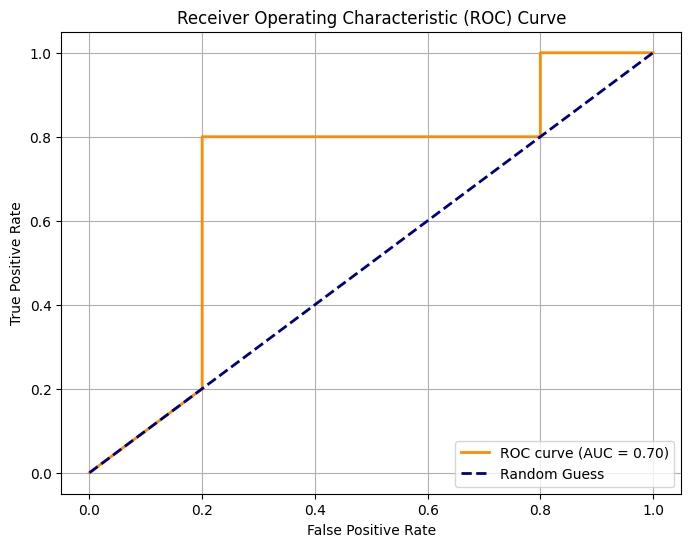

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true and y_pred_proba are available
# y_true: true labels
# y_pred_proba: predicted probabilities of the positive class

# For demonstration, let's create some example predicted probabilities
# In a real scenario, these would come from your trained model
y_pred_proba = np.array([0.1, 0.9, 0.4, 0.8, 0.3, 0.2, 0.7, 0.4, 0.6, 0.9])

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()